In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset=pd.read_csv('./tested.xls')
dataset

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

In [3]:
dataset.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [4]:
dataset.shape

(418, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
dataset.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [7]:
dataset['Cabin'].nunique()

76

In [8]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# Dealing with missing data
dataset['Age'].replace(np.nan, dataset['Age'].mean(), inplace=True)
dataset['Fare'].replace(np.nan, dataset['Fare'].mean(), inplace=True)
dataset.drop('Cabin', axis=1,inplace=True)
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
dataset['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

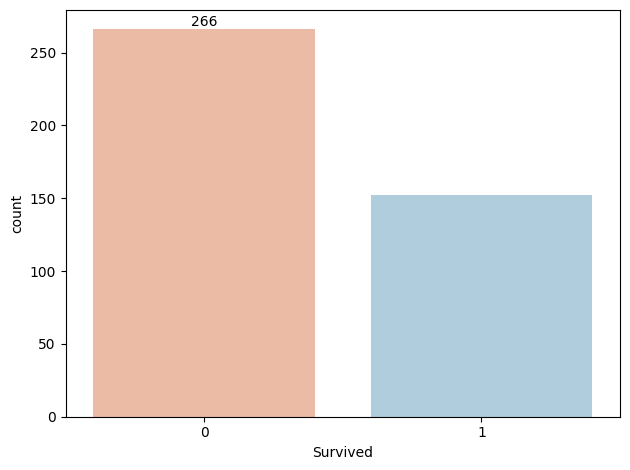

In [11]:
ax = sns.countplot(x=dataset['Survived'],hue=dataset['Survived'],palette='RdBu',legend=False)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()


In [12]:
dataset.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

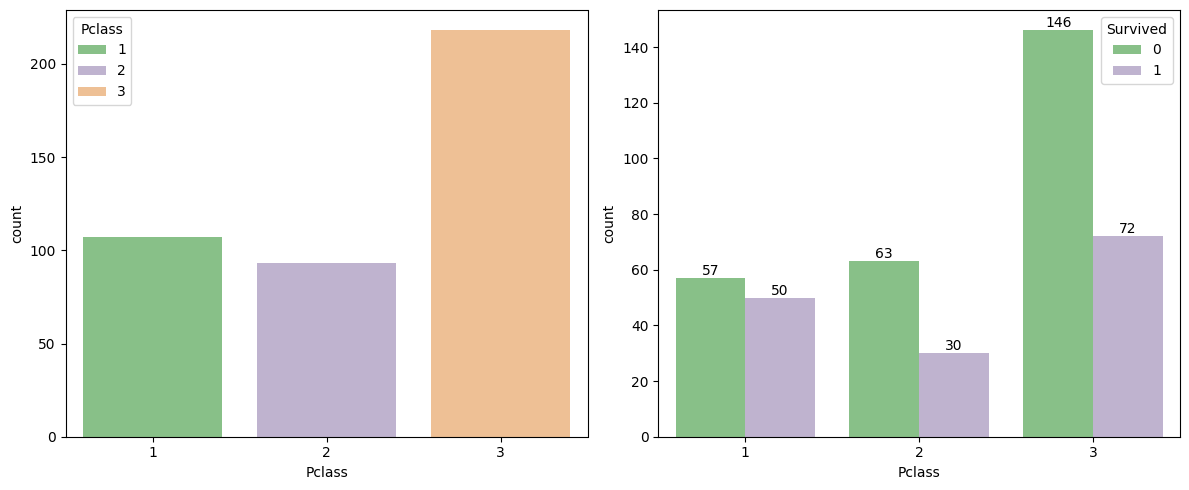

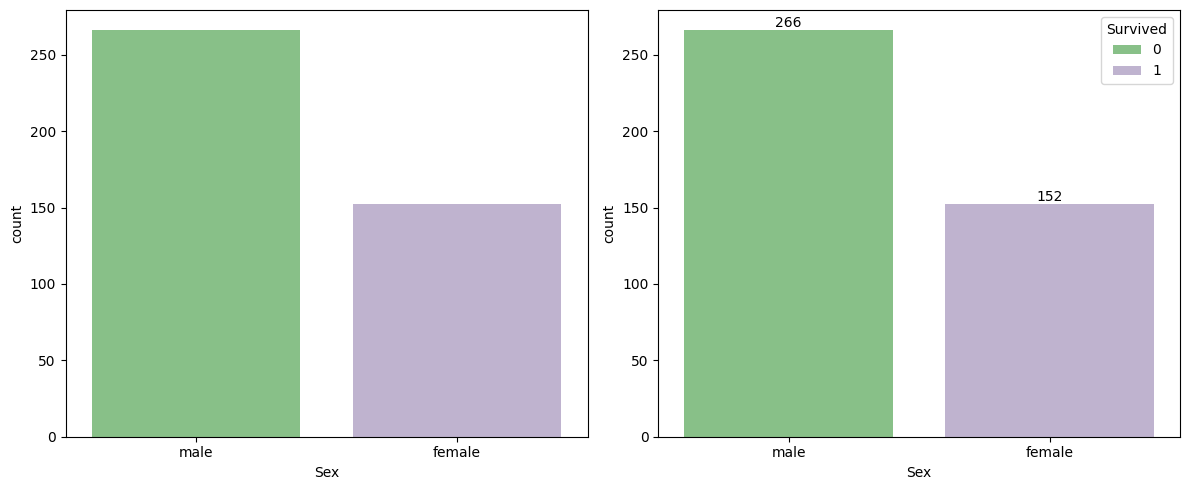

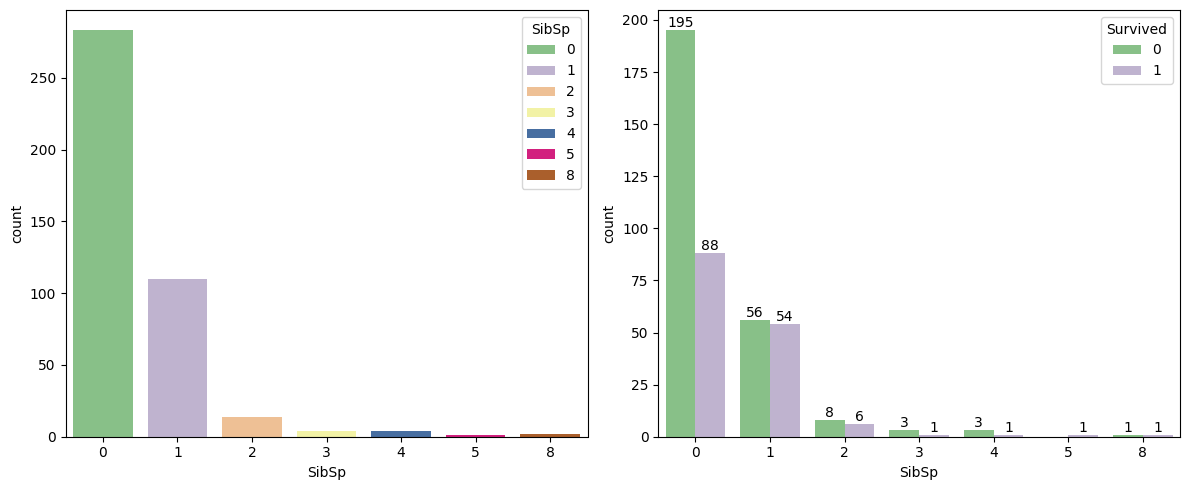

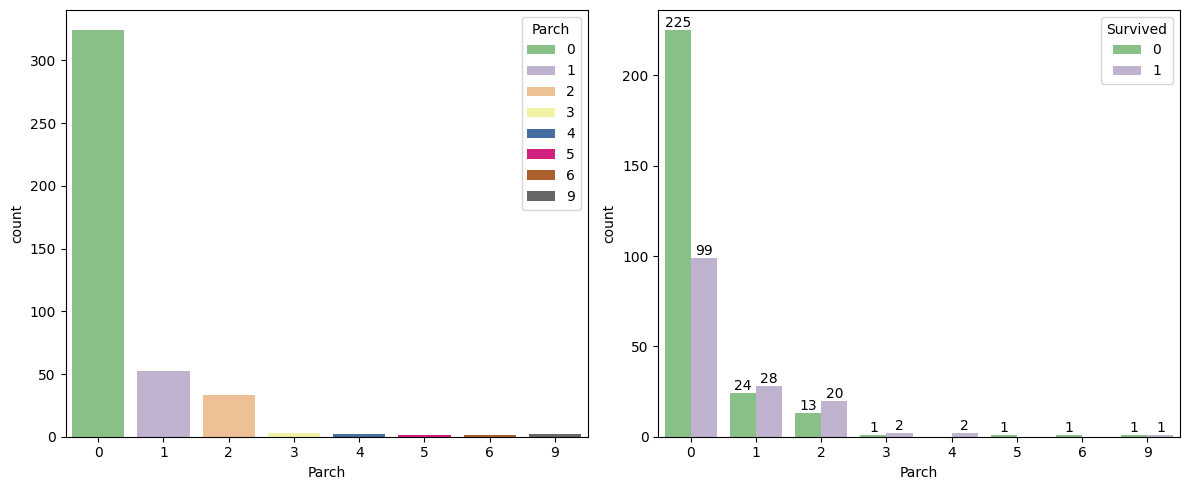

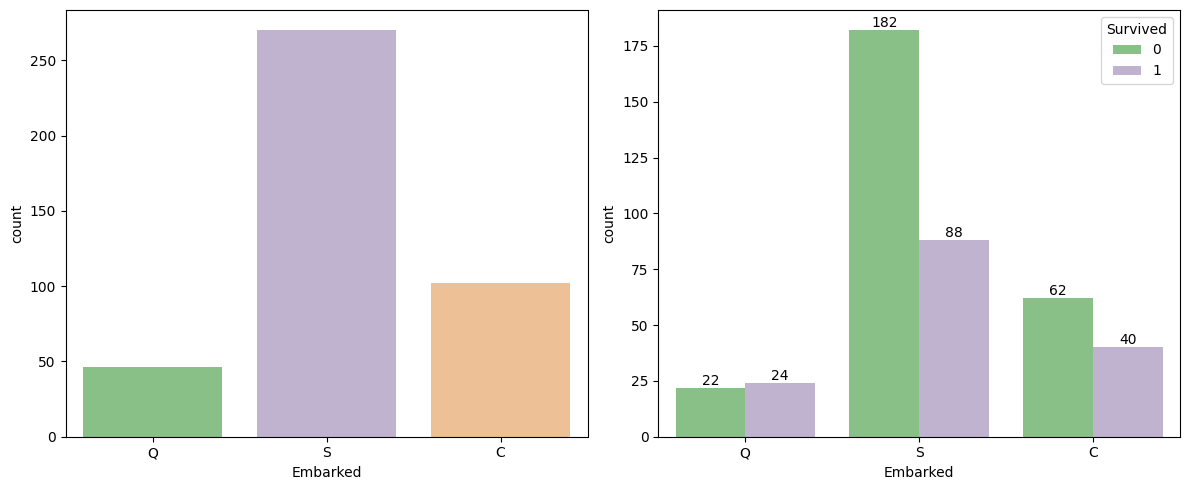

In [13]:
for column in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=dataset,hue=dataset[column],palette='Accent')
   # ax.bar_label(ax.containers[0])

    plt.subplot(1,2,2)
    ax = sns.countplot(x=column, data=dataset, hue='Survived', palette='Accent')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.tight_layout()
    plt.show()

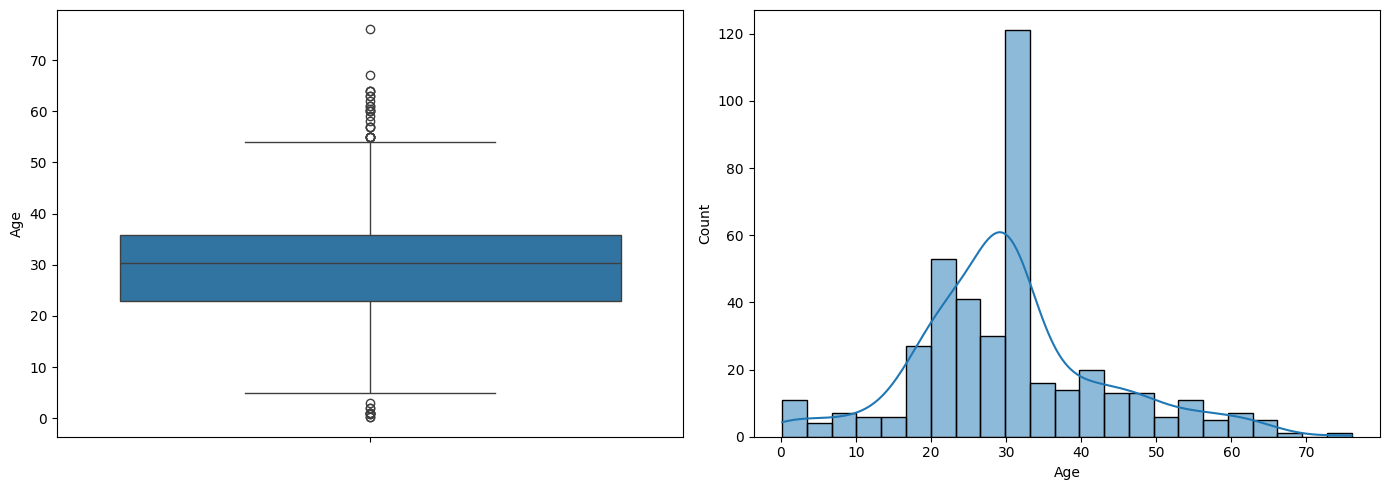

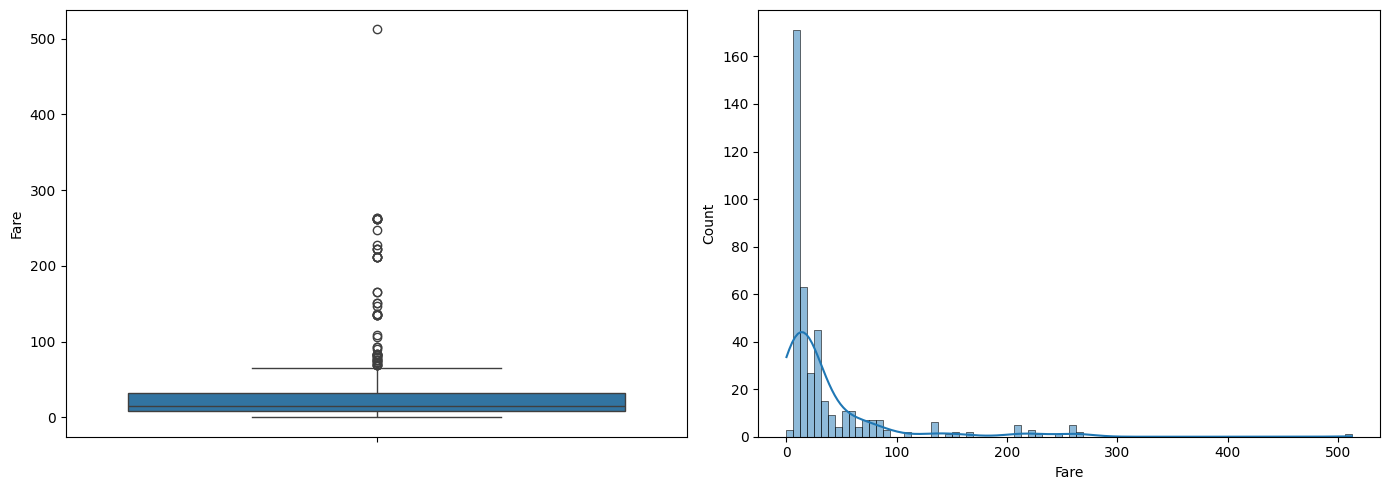

In [14]:
for column in ['Age', 'Fare']:
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ax = sns.boxplot(dataset[column])

    plt.subplot(1,2,2)
    ax = sns.histplot(dataset[column],kde=True)
    plt.tight_layout()
    plt.show()

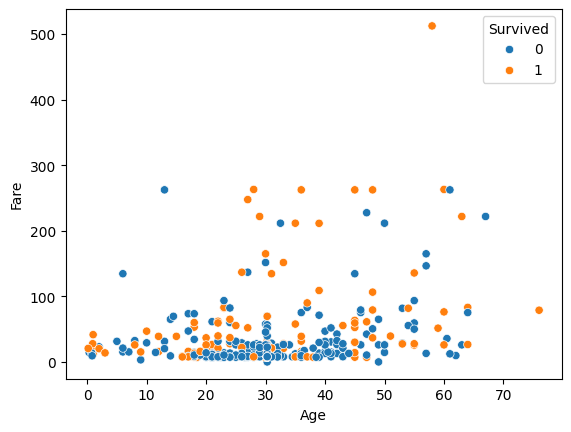

In [15]:
sns.scatterplot(data=dataset, x='Age', y='Fare', hue='Survived')
plt.show()

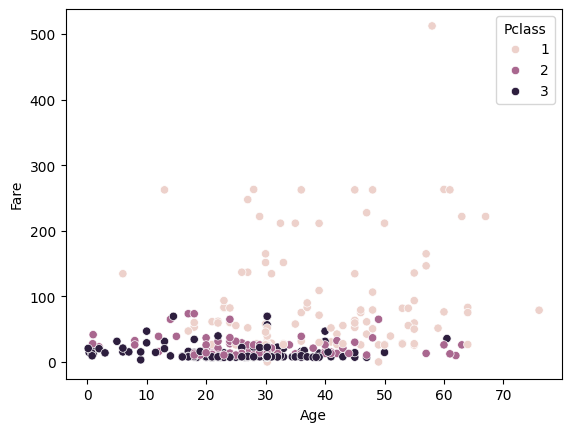

In [16]:
sns.scatterplot(data=dataset, x='Age', y='Fare', hue='Pclass')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
dataset.Sex=en.fit_transform(dataset.Sex)
dataset.Embarked=en.fit_transform(dataset.Embarked)


In [18]:
dataset.head(10)

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   
5          897         0       3   
6          898         1       3   
7          899         0       2   
8          900         1       3   
9          901         0       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    1  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    0  47.0      1      0   
2                     Myles, Mr. Thomas Francis    1  62.0      0      0   
3                              Wirz, Mr. Albert    1  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0  22.0      1      1   
5                    Svensson, Mr. Johan Cervin    1  14.0      0      0   
6                          Connolly, Miss. Kate    0  30.0      0      0   
7                  Caldwell, Mr. Albert Francis    1  26.0      1      1   
8     Abrahim, Mrs. Joseph (Sophie Halaut Easu)    0  18.0      0      0   
9                       Davies, Mr. John Samuel    1  21.0      2      0   

      Ticket     Fare  Embarked  
0     330911   7.8292         1  
1     363272   7.0000         2  
2     240276   9.6875         1  
3     315154   8.6625         2  
4    3101298  12.2875         2  
5       7538   9.2250         2  
6     330972   7.6292         1  
7     248738  29.0000         2  
8       2657   7.2292         0  
9  A/4 48871  24.1500         2

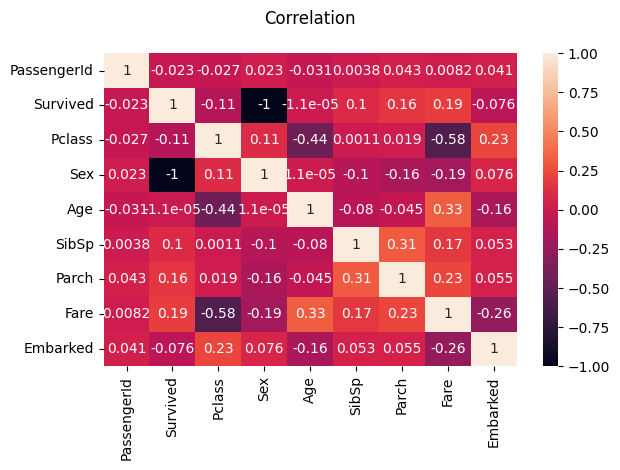

In [19]:
sns.heatmap(dataset.corr(numeric_only=True),annot=True)
plt.title("Correlation\n")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [21]:
X = dataset.drop(['Survived','Name','PassengerId','Ticket'],axis=1)
y = dataset['Survived']

In [22]:
X.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         1
1       3    0  47.0      1      0   7.0000         2
2       2    1  62.0      0      0   9.6875         1
3       3    1  27.0      0      0   8.6625         2
4       3    0  22.0      1      1  12.2875         2

In [23]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LogR = LogisticRegression(random_state=42)
LogR.fit(X_train, y_train)



LogisticRegression(random_state=42)

In [24]:
y_pred = LogR.predict(X_test)

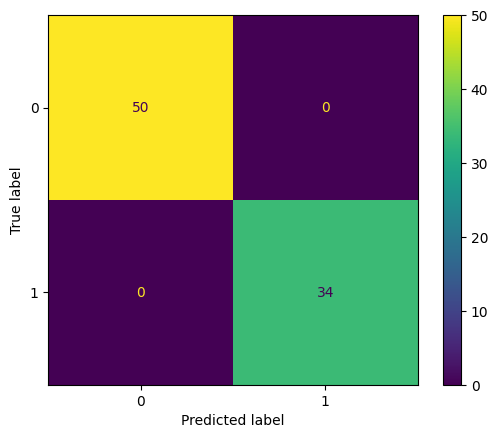

In [25]:
cm = confusion_matrix(y_test, y_pred, labels=LogR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LogR.classes_)
disp.plot();

In [26]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
